http://archive.ics.uci.edu/ml/datasets/thyroid+disease [[Page](https://www.openml.org/d/57)] [[CSV](https://www.openml.org/data/get_csv/57/dataset_57_hypothyroid.arff)]
Target – Class

Scoring (10 max):
* EDA: exploration of variables and properties of data with conclusions - 1
* Data preprocessing if needed - 2
    * Handling missing values
    * Dropping unimportant features
    * Data normalization
    * Categorical encoding
* [Scikit pipeline](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) usage – 2
* Metrics and cross-validation chosen as well as reasoning behind – 1
* Different techniques for handling imbalance data (over\under sampling, class weight) - 2
* Feature engineering e.g. [transformations](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer) (nonlinear) - 1
* Feature importance and [hyperparameters](http://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers) tuning – 1

Models: Logistic Regression w\wo regularization; K-nearest neighbors

***

In [79]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Заглянем в файл, увидим, что missing values кодируются символом вопроса "?", boolean features кодируются символами "f", "t"

In [80]:
df = pd.read_csv('data/dataset_57_hypothyroid.csv', na_values='?', true_values='t', false_values='f')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,False,False,False,False,False,False,False,False,...,True,125.0,True,1.14,True,109.0,False,NaN,SVHC,negative
1,23.0,F,False,False,False,False,False,False,False,False,...,True,102.0,False,NaN,False,NaN,False,NaN,other,negative
2,46.0,M,False,False,False,False,False,False,False,False,...,True,109.0,True,0.91,True,120.0,False,NaN,other,negative
3,70.0,F,True,False,False,False,False,False,False,False,...,True,175.0,False,NaN,False,NaN,False,NaN,other,negative
4,70.0,F,False,False,False,False,False,False,False,False,...,True,61.0,True,0.87,True,70.0,False,NaN,SVI,negative


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3771 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null bool
query_on_thyroxine           3772 non-null bool
on_antithyroid_medication    3772 non-null bool
sick                         3772 non-null bool
pregnant                     3772 non-null bool
thyroid_surgery              3772 non-null bool
I131_treatment               3772 non-null bool
query_hypothyroid            3772 non-null bool
query_hyperthyroid           3772 non-null bool
lithium                      3772 non-null bool
goitre                       3772 non-null bool
tumor                        3772 non-null bool
hypopituitary                3772 non-null bool
psych                        3772 non-null bool
TSH_measured                 3772 non-null bool
TSH                          3403 non-null float64
T3_measured          

In [82]:
df['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

* 'TBG' можно сразу выкинуть, ибо столбец пустой
* 20 boolean featuers, 6 (без 'TBG') числовых, 3 строковых
* есть missing values, их может быть и немного, но это еще ни о чем хорошем не говорит
* выборка очень-очень-очень несбалансирована. в выборке 3772 объекта, а один из target-классов представлен лишь 2(!) объектами, и что с этим делать – не ясно

In [83]:
if 'TBG' in df:
    df = df.drop(columns=['TBG'])

Посмотрим на гистограммы категориальных признаков

In [84]:
cat_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']

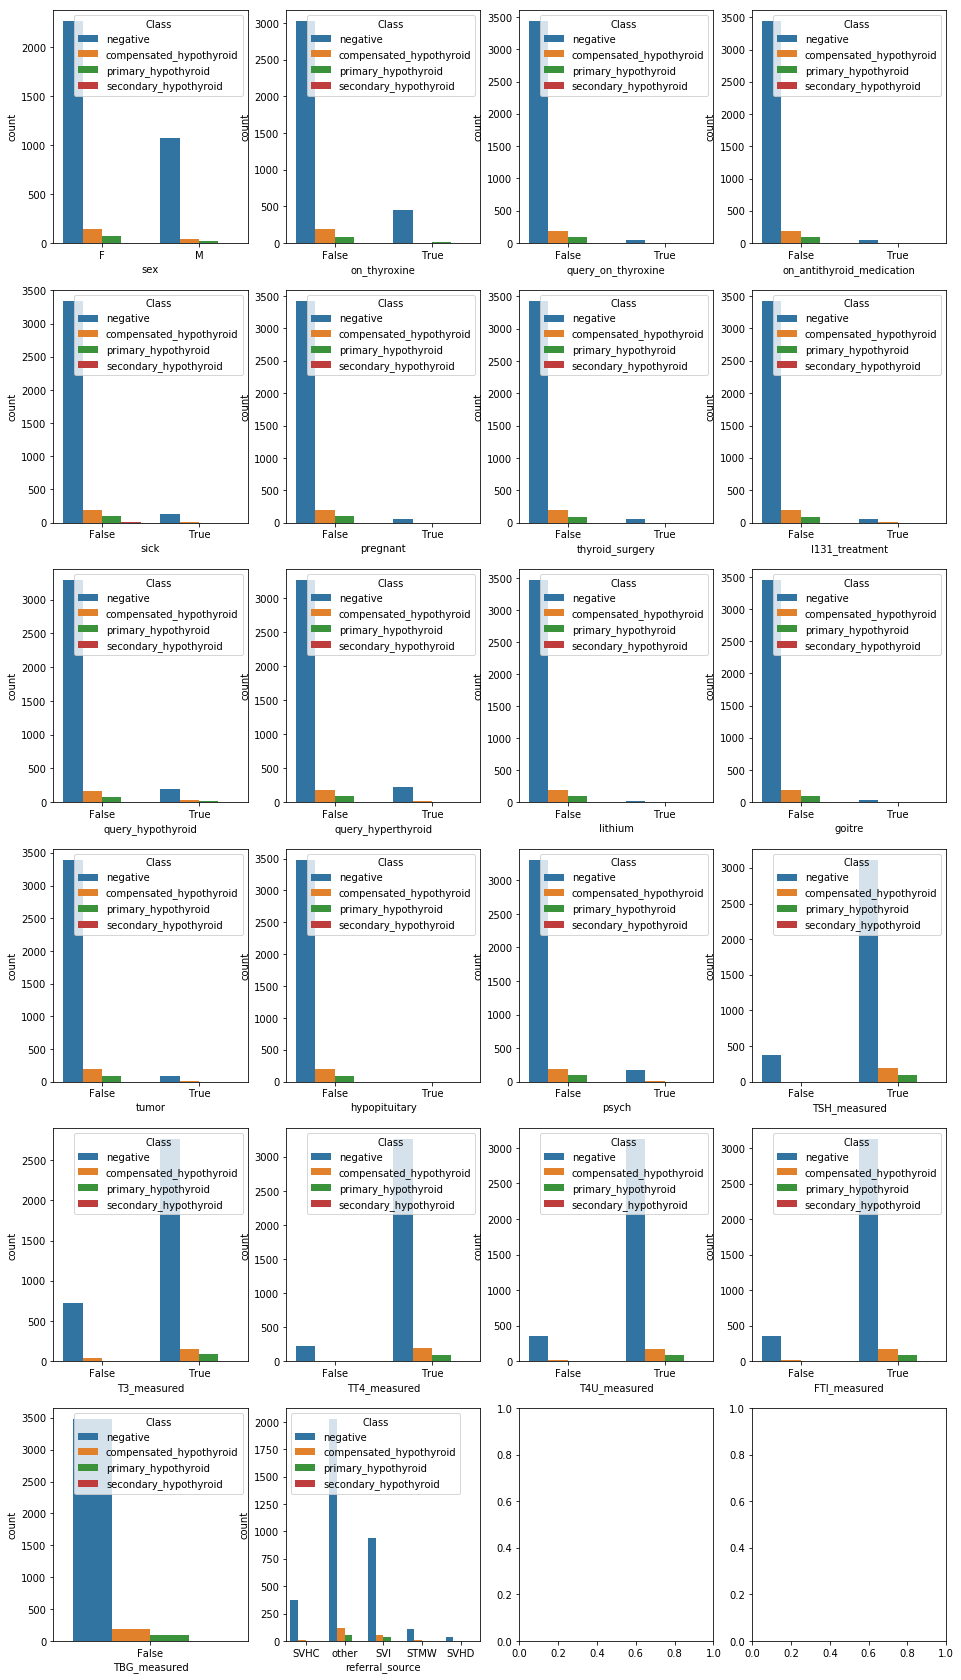

In [85]:
f, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 30))
for index, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, hue='Class', data=df, ax=axes[index//4, index%4]);

* 'TBG_measured' также бесполезный признак, поскольку имеет всегда одно значение False и missing values в нем нет. поэтому выбросим его. можно, наверное, было сразу догадаться, что так будет, посмотрев на названия столбцов – если в 'TGB' ничего нет, значит этот параметр у больных не измерялся, соответственно 'TGB_**measured**' всегда должно быть False
* сказать, что по каким-то из этих признаков один из классов хорошо отделяется, я не могу
* наглядное подтверждение тому, что выборка несбалансирована

Посмотрим на гистограммы без класса Class='negative'

In [86]:
if 'TBG_measured' in df:
    df = df.drop(columns=['TBG_measured'])
cat_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'referral_source']

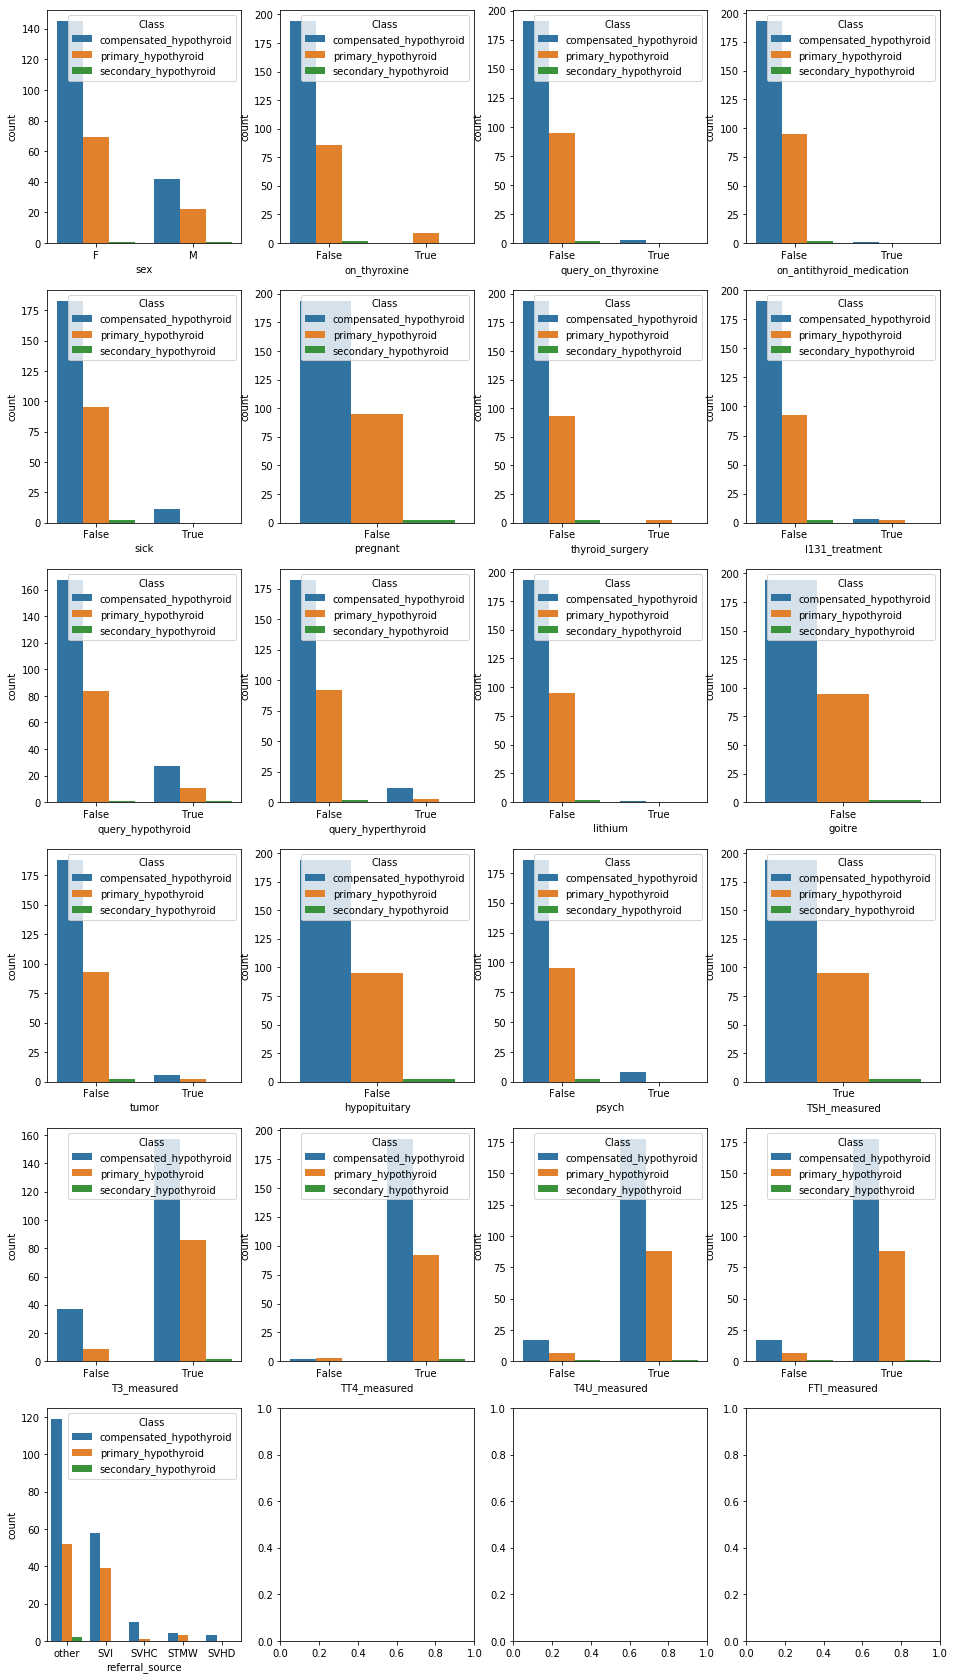

In [87]:
df_pos = df[df['Class'] != 'negative']
f, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 30))
for index, col_name in enumerate(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'referral_source']):
    sns.countplot(x=col_name, hue='Class', data=df_pos, ax=axes[index//4, index%4]);

* у положительных (т.е. у больных людей) трех классов некоторые признаки имеют лишь одно значение
* если смотреть на эту подвыборку отдельно, то можно отметить, что и она плохо сбалансирована
* в целом, смотря на эти графики, нельзя сказать, что в данных есть какая-нибудь очевидная структура, которая могла бы помочь в классификации

Посмотрим на распределения вещественных переменных

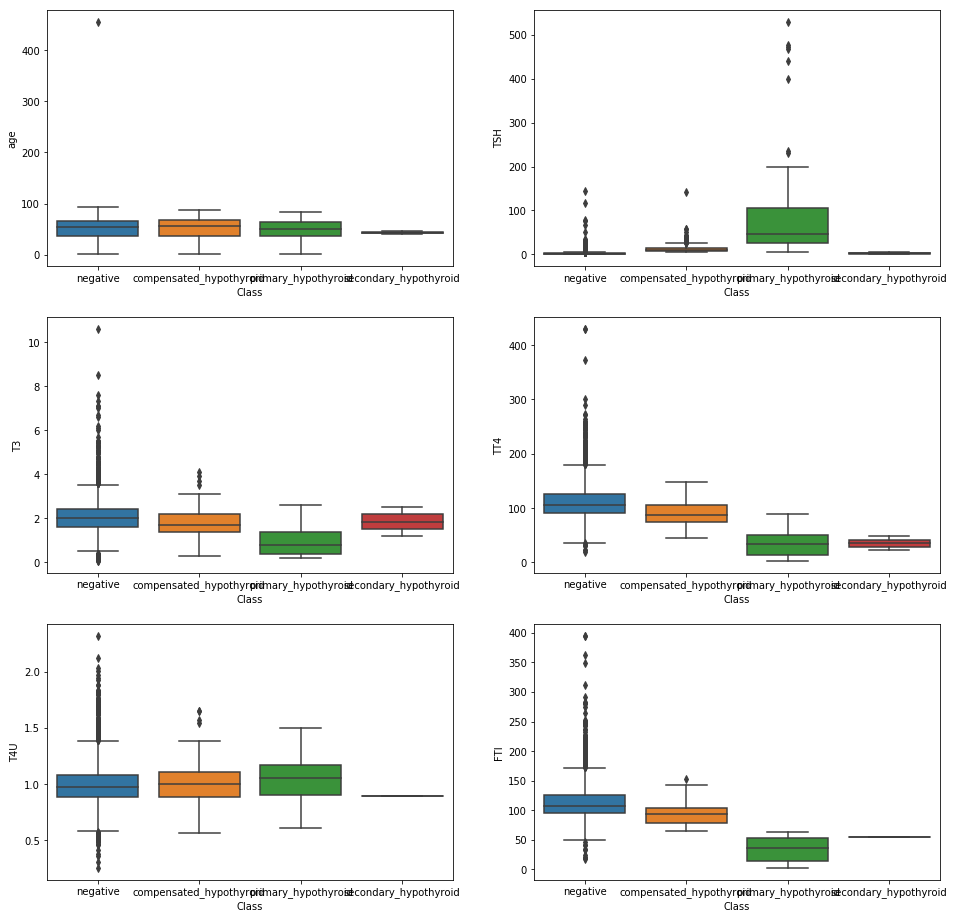

In [88]:
real_features = ['age','TSH','T3','TT4','T4U','FTI']
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
for index, col_name in enumerate(real_features):
#     plt.hist(df[col_name].values)
    sns.boxplot(x='Class', y=col_name, data=df, ax=axes[index//2, index%2])

и без Class='negative'

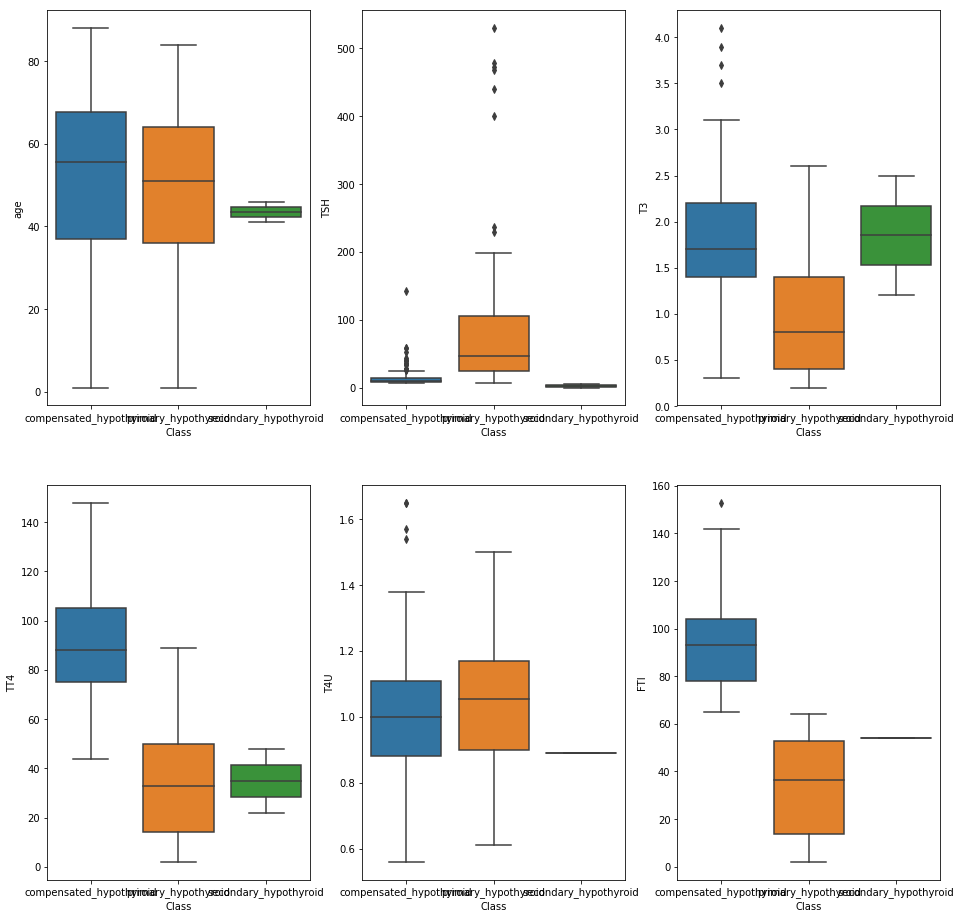

In [89]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 16))
for index, col_name in enumerate(real_features):
    sns.boxplot(x='Class', y=col_name, data=df_pos, ax=axes[index//3, index%3])

* на картине в целом можно увидеть некоторое (большое или нет по картинкам судить сложно) количество outliers
* большинство outliers принадлежат классу negative, что радует, потому что в этом классе объектов гораздо больше, чем в остальных, и поэтому объекты с выбросами можно будет безболезненно (но это не точно) удалить
* если смотреть на картину "положительных" (т.е. людей с той или иной формой болезни, не Class='negative'), то можно увидеть, что классы primary и secondary визуально отделяются по признакам FTI и TSH. проверим эту гипотезу
* можно предположить, что вещественные признаки будут иметь бОльшую значимость при классификации, чем категориальные, особенно если сначала отделить класс negative

Итак, сначала проверим гипотезу

In [90]:
df_pos.groupby(['Class'])['TSH'].aggregate(['min', 'max'])

,min,max
Class,,
compensated_hypothyroid,6.100,143.0
primary_hypothyroid,6.200,530.0
secondary_hypothyroid,0.015,4.6


Да, действительно, класс secondary с двумя объектами можно отделить от других двух положительных лишь по одному признаку TSH, причем это "правило" является вполне хорошим, потому что больше данных у нас нет, и, возможно, какое-нибудь решающее дерево именно так и сделало бы

In [91]:
df_pos.groupby(['Class'])['FTI'].aggregate(['min', 'max'])

,min,max
Class,,
compensated_hypothyroid,65.0,153.0
primary_hypothyroid,2.0,64.0
secondary_hypothyroid,54.0,54.0


Да, аналогично получается отделить primary от compensated по признаку FTI

Посмотрим внимательнее на outliers на графиках и подумаем, какие объекты можно выкинуть. Значения, по которым производилось отсечение, подбирались глядением на boxplotы и гистограммы. Для каждого класса в первой строчке графиков отображается распределение признаков до удаления объектов, во второй - после. В положительных классах важно выкинуть только совсем outlierы, потому что объектов и так мало.

In [92]:
df_wo = df.copy()

In [93]:
def drop_with_plots(df, cls, index, bins0, bins1):
    def plot(row, bins):
        for index, col_name in enumerate(real_features):
            ax = axes[row, index]
            df[df['Class'] == cls][col_name].hist(ax=ax, bins=bins)
            ax.set_xlabel(col_name)

    f, axes = plt.subplots(nrows=2, ncols=6, figsize=(48, 8))
    plot(row=0, bins=bins0)
    df = df.drop(axis=0, index=index)
    plot(row=1, bins=bins1)
    print('%d objects dropped for Class=%s' % (len(index), cls))
    return df

0 objects dropped for Class=negative


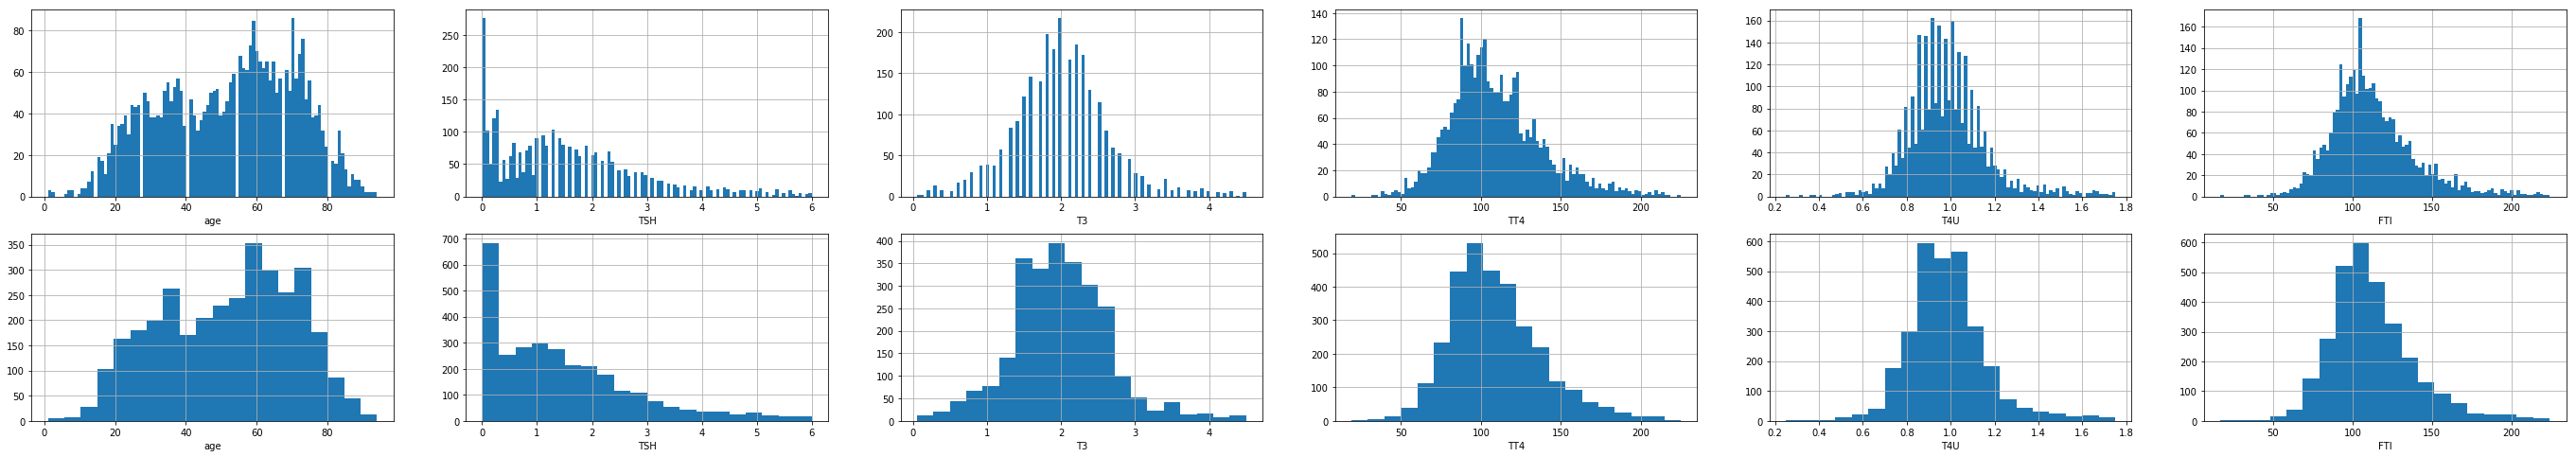

In [97]:
index = df_wo[(df_wo['Class'] == 'negative') &
              ((df_wo['age'] > 100) |
               (df_wo['TSH'] > 6.2) |
               (df_wo['T3'] > 4.5) |
               (df_wo['TT4'] > 225) |
               (df_wo['T4U'] > 1.75) |
               (df_wo['FTI'] > 230))].index
df_wo = drop_with_plots(df_wo, 'negative', index, 100, 20)

0 objects dropped for Class=compensated_hypothyroid


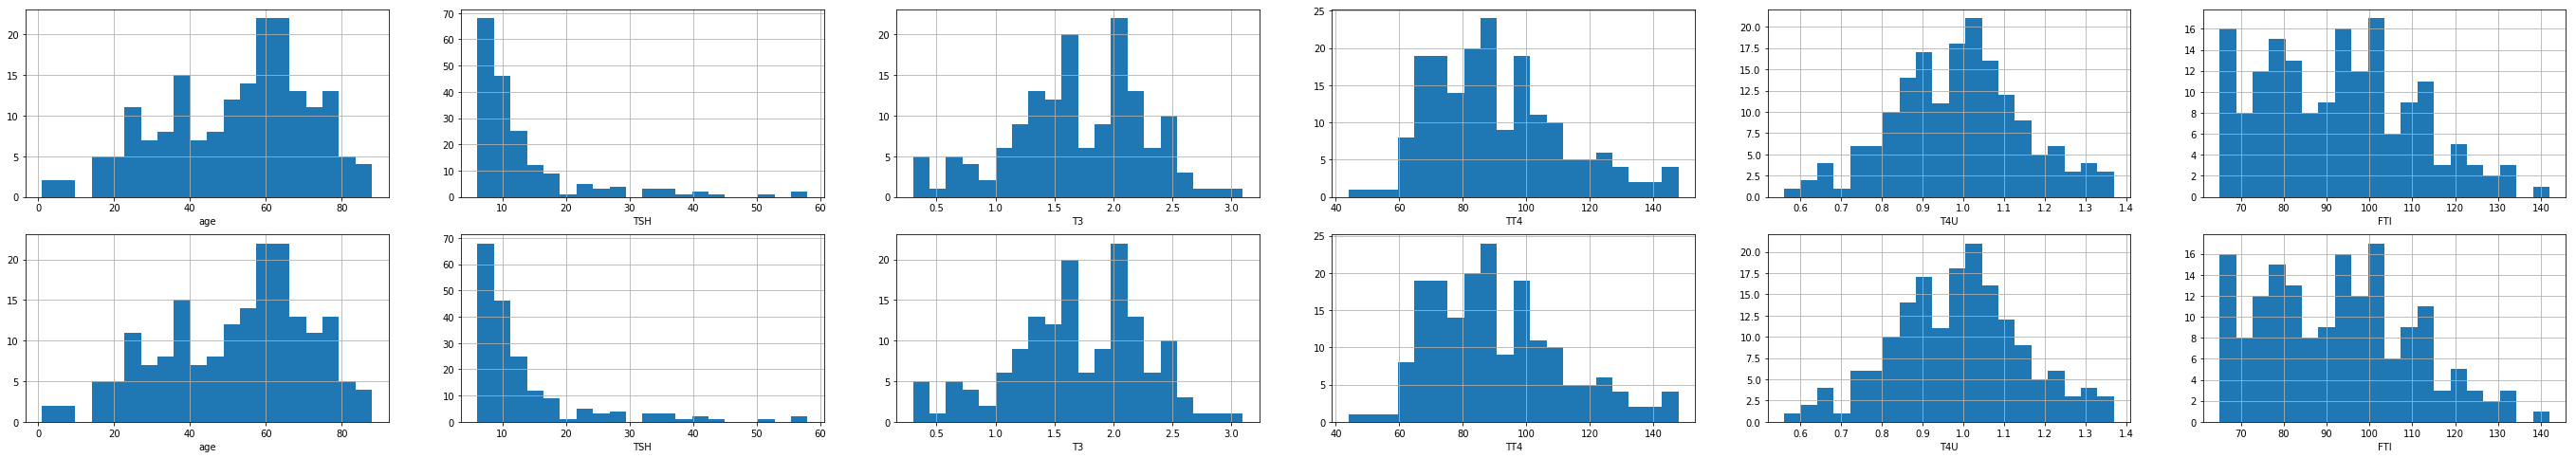

In [98]:
index = df_wo[(df_wo['Class'] == 'compensated_hypothyroid') &
              ((df_wo['T3'] > 3.3) |
               (df_wo['T4U'] > 1.45) |
               (df_wo['FTI'] > 145) |
               (df_wo['TSH'] > 100))].index
df_wo = drop_with_plots(df_wo, 'compensated_hypothyroid', index, 20, 20)

0 objects dropped for Class=primary_hypothyroid


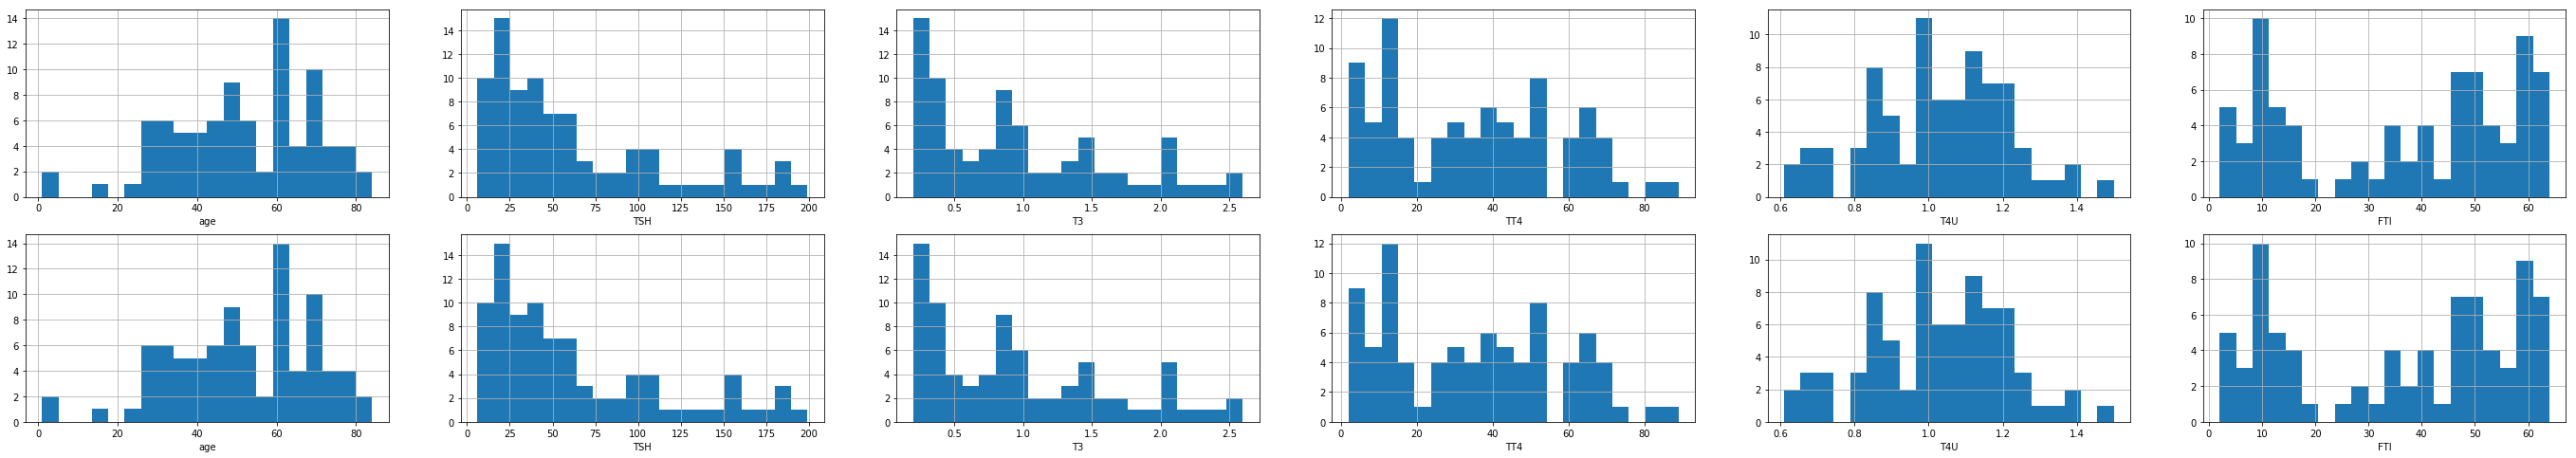

In [99]:
index = df_wo[(df_wo['Class'] == 'primary_hypothyroid') &
              (df_wo['TSH'] > 210)].index
df_wo = drop_with_plots(df_wo, 'primary_hypothyroid', index, 20, 20)

Итого из класса negative ушел 151 объект, из compensated и primary по 8. Из secondary по очевидным причинам 0

Теперь посмотрим на пропуски и подумаем, что с ними делать

In [100]:
df_nulls = df_wo[df_wo.isnull().any(axis=1)]

In [101]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 1 to 3767
Data columns (total 28 columns):
age                          1084 non-null float64
sex                          942 non-null object
on_thyroxine                 1085 non-null bool
query_on_thyroxine           1085 non-null bool
on_antithyroid_medication    1085 non-null bool
sick                         1085 non-null bool
pregnant                     1085 non-null bool
thyroid_surgery              1085 non-null bool
I131_treatment               1085 non-null bool
query_hypothyroid            1085 non-null bool
query_hyperthyroid           1085 non-null bool
lithium                      1085 non-null bool
goitre                       1085 non-null bool
tumor                        1085 non-null bool
hypopituitary                1085 non-null bool
psych                        1085 non-null bool
TSH_measured                 1085 non-null bool
TSH                          721 non-null float64
T3_measured            

In [102]:
df_nulls['Class'].value_counts()

negative                   1012
compensated_hypothyroid      58
primary_hypothyroid          14
secondary_hypothyroid         1
Name: Class, dtype: int64

1085 строк с хотя бы одним пропущенным значением. Причем пропуски только в sex и вещественных признаках. Я думаю, можно выкинуть все, что относится к классу negative – от этого задача станет только сбалансированнее – если распределение признаков не [сильно] изменится после этого. Посмотрим

1012 objects dropped for Class=negative


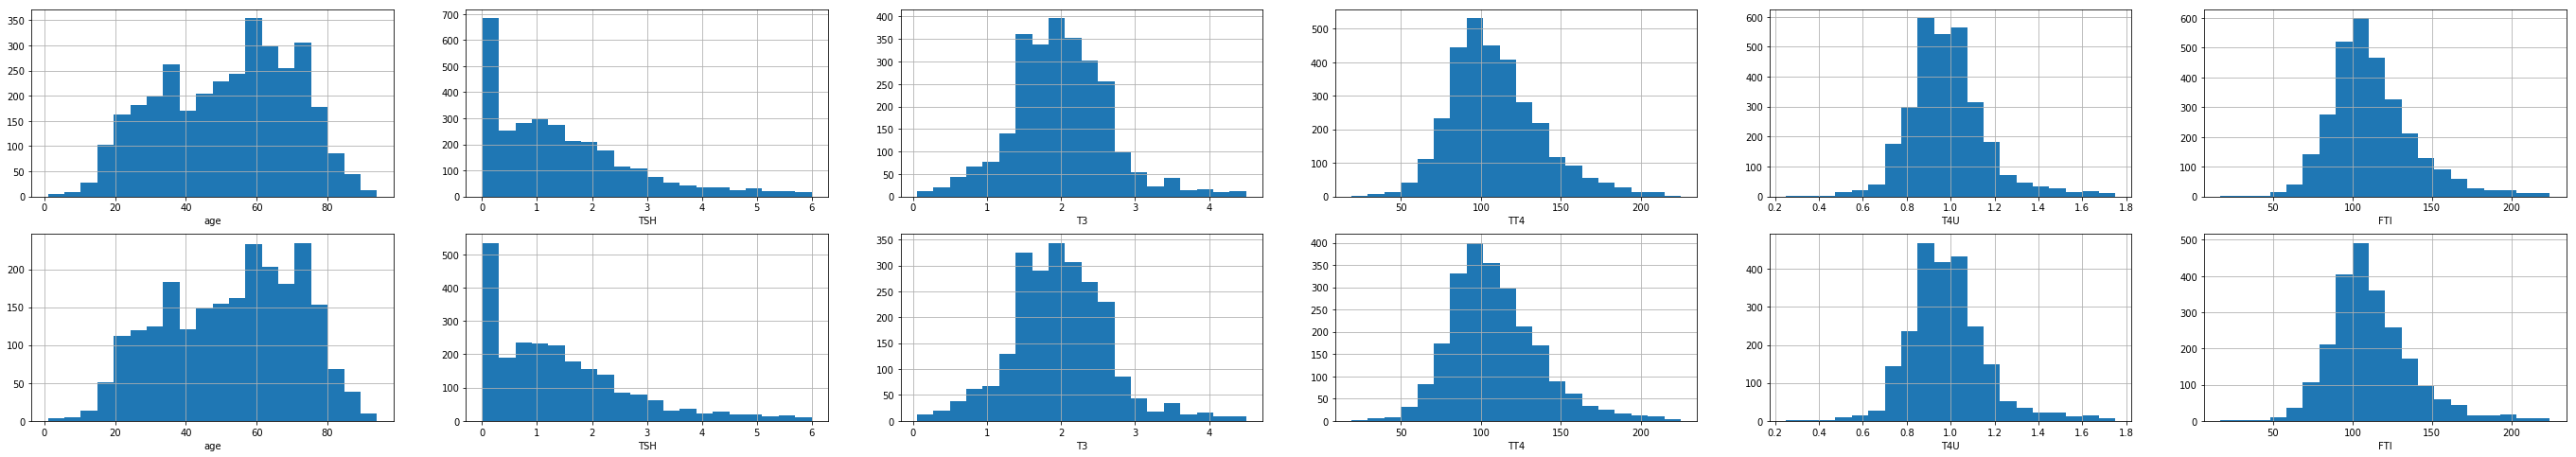

In [117]:
index = df_nulls[df_nulls['Class'] == 'negative'].index
df_wo = drop_with_plots(df_wo, 'negative', index, 80, 80)

Да, картина не сильно изменилась, поэтому оставим так

Теперь будем разбираться с положительными классами. Посмотрим что пропущено в объекте класса secondary – лишь T4U и FTI, только вещественные признаки. Для вещественных признаков есть очевидные способы заполнения пропусков (среднее/медиана по таргет-классу). Так и сделаем, заполним пропуски медианой по признаку в данном классе. Для одного объекта класса secondary таким образом будет произведена замена их на значения из другого объекта этого класса

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
for cls in ['compensated_hypothyroid', 'primary_hypothyroid', 'secondary_hypothyroid']:
    df_cls = df_wo[df_wo['Class'] == cls]
    df_wo.loc[df_cls.index, real_features] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(df_cls[real_features])
#     df_wo.loc[df_cls.index] = df_wo.loc[df_cls.index].fillna(df_cls.median())

Что делать с категориальным sex не очень ясно. Попробуем следующее: найдем три (в общем случае несколько) объекта, наиболее близких к данному по признакам, в которых нет пропусков, и заполним пропуски средними по найденным трем объектами. По сути мы решаем две (для классов primary и secondary) kNN задачи классификации. При этом строковые признаки нужно закодировать

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [109]:
def fill_missing_values_with_knn(df, cls, n):
    df_cls = df[df['Class'] == cls]
    df_cls['referral_source'] = LabelEncoder().fit_transform(df_cls['referral_source'])
    df_cls_not_null = df_cls[df_cls['sex'].notnull()]
    X_train = df_cls_not_null.drop(columns=['sex', 'Class'])
    y_train = df_cls_not_null['sex']
    X_test = df_cls[df_cls['sex'].isnull()].drop(columns=['sex', 'Class'])
    if len(X_test) == 0:
        return

    clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    df.loc[X_test.index, 'sex'] = clf.predict(X_test)
    return df.loc[X_test.index]

In [110]:
fill_missing_values_with_knn(df_wo, 'compensated_hypothyroid', 3)

/home/majestic905/.venvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
85,34.0,F,False,False,False,False,False,False,False,False,...,True,2.0,True,95.0,True,0.99,True,96.0,STMW,compensated_hypothyroid
115,1.0,M,False,False,False,False,False,False,False,False,...,True,1.9,True,113.0,True,0.86,True,131.0,STMW,compensated_hypothyroid
400,35.0,F,False,False,False,False,False,False,False,False,...,True,2.5,False,87.0,False,0.99,False,93.0,other,compensated_hypothyroid
2169,63.0,F,False,False,False,False,False,False,False,False,...,True,1.9,True,89.0,True,1.04,True,85.0,SVI,compensated_hypothyroid
2662,83.0,F,False,False,False,False,False,False,False,False,...,False,1.7,True,148.0,True,1.11,True,134.0,other,compensated_hypothyroid
2899,40.0,F,False,False,False,False,False,False,False,False,...,True,1.7,True,78.0,True,0.90,True,87.0,other,compensated_hypothyroid
3426,65.0,F,False,False,False,False,False,False,False,False,...,True,2.0,True,78.0,False,0.99,False,93.0,other,compensated_hypothyroid


In [112]:
fill_missing_values_with_knn(df_wo, 'primary_hypothyroid', 3)


/home/majestic905/.venvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
671,74.0,F,False,False,False,False,False,False,False,False,...,True,1.2,True,71.0,True,1.11,True,64.0,SVI,primary_hypothyroid
2103,68.0,F,False,False,False,False,False,False,False,False,...,True,0.3,True,6.0,True,0.80,True,7.6,other,primary_hypothyroid
2551,1.0,F,False,False,False,False,False,False,False,False,...,False,0.8,False,34.0,False,1.04,False,41.0,STMW,primary_hypothyroid


Теперь у нас нет пропусков, и можно пытаться применять модели. Как показал EDA, положительные классы вполне можно разделить вручную, поэтому можно попытаться свести задачу к бинарной, т.е. сначала классифицировать классы как положительные и отрицательные, затем положительные классы между собой. Считаю такой трюк в какой-то степени опраданным, поскольку данные у нас такие, какие есть, их мало, и нельзя однозначно утверждать, прокатило бы это или нет, если бы было данных больше. Возможно нет, потому что границы между классами не были бы разделимыми. С другой стороны, судя по имеющимся данным, они должны были бы быть _почти_ разделимыми, т.е. картина не должна была бы принципиально поменяться. Поэтому так и поступим

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, LabelBinarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *

В качестве метрик будем использовать precision, recall, и fbeta ([micro-averaging](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)). roc на подобных датасетах дает неадекватную действительности оценку (хотя теоретически и не изменяется при изменении баланса классов). В качестве стратегии кросс-валидации нужно использовать StratifiedKFold. В документации к cross_val_score (и cross_validate) написано, что функция использует StratifiedKFold по умолчанию при классификации, но будем использовать явно. Будем использовать cross_validate вместо cross_val_score, чтобы получить score по нескольким метрикам сразу

Немного модифицируем стандартный классификатор, чтобы он делал то, что я задумал. Перед fit преобразуем таргет к бинарному виду, после predict – обратно. X в первых двух столбцах содержит признаки TSH и FTI, они использутюся только на этапе predict и не используются для обучения логистической регрессии

In [203]:
class CustomClassifier(LogisticRegression):
    def fit(self, X, y, sample_weight=None):
        y = np.where(y == 'negative', 'negative', 'positive')
        return super().fit(X[:, 2:], y, sample_weight)
        
    def predict(self, X):
        labels = super().predict(X[:, 2:])
        labels = np.where(labels == 'negative',
                          'negative',
                          np.where(X[:, 0] < 5,
                                   'secondary_hypothyroid',
                                   np.where(X[:, 1] < 64.5,
                                            'primary_hypothyroid',
                                            'compensated_hypothyroid')))
        return labels

Предобработаем данные. 'F' и 'M' в sex заменим на 0 и 1, для refererral_source применим one hot, вещественные признаки масштабируем. Признаки FTI и TSH необходимо сохранить как есть, поэтому скопируем/добавим соответствующие в начало матрицы, и будем использовать только на этапе predict (см. CustomClassfier)

In [204]:
data = df_wo.copy()
data.loc[:, 'sex'] = LabelEncoder().fit_transform(data['sex'])
data = pd.concat([data.drop(columns=['referral_source']), pd.get_dummies(data['referral_source'])], axis=1)
data = pd.concat([data[['TSH']], data[['FTI']], data], axis=1)

/home/majestic905/.venvs/ml/lib/python3.5/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.986885894411414 0.986885894411414 0.986885894411414


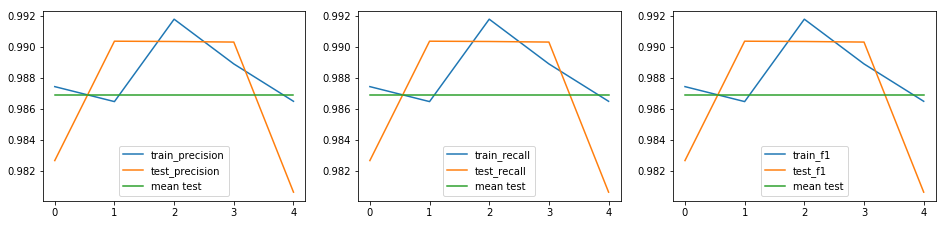

In [205]:
clf = CustomClassifier(class_weight='balanced', multi_class='auto', solver='liblinear')

def pr_score(y_true, y_pred):
    return precision_score(y_true, y_pred, average='micro')

def rc_score(y_true, y_pred):
    return recall_score(y_true, y_pred, average='micro')

def f1score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

score = cross_validate(estimator=clf,
                X=data.drop(columns=['Class']).values,
                y=data['Class'].values,
                cv=StratifiedKFold(n_splits=5, shuffle=True),
                scoring={'precision': make_scorer(pr_score),
                         'recall': make_scorer(rc_score),
                         'f1': make_scorer(f1score)},
                return_train_score=True)

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 3.5))
for index, metric in enumerate(['precision', 'recall', 'f1']):
    ax[index].plot(score['train_%s' % metric], label=('train_%s' % metric))
    ax[index].plot(score['test_%s' % metric], label=('test_%s' % metric))
    ax[index].plot(np.repeat(score['test_%s' % metric].mean(), 5), label=('mean test'))
    ax[index].legend()

print(np.mean(score['test_precision']), np.mean(score['test_recall']), np.mean(score['test_f1']))

При этом разумные значения precision будут начинаться от доли класса negative в общем числе объектов

In [206]:
len(data[data['Class'] == 'negative'])/len(data)

0.893945237177015

1) Сравнить CustomClassifier с LogisticRegression (проверил, качество отличается с районе тысячных, увы)

2) Обучить на 3/4 выборки несколько раз и посмотреть на confusion matrix? ...зачем? затем чтобы посмотреть как много объектов на самом деле объектов неверно кл-ся, потому что число 0.98 не вполне информативно

3) идеологически верный вариант Pipeline (Imputer, LabelPropagation, LabelBinarizer, etc) + GridSearchCV, заценить насколько упадет качество

## Старое

Однако я бы использовал модель, полученную оптимизацией метрики fbeta score с beta < 1, например beta = 0.5, при которой точность оказывается важнее полноты, потом что в текущей модели из и без того немногочисленного положительного класса 10% объектов оказываются false negative, а в этой задаче лучше ошибиться в отнесении не-больного к больным, чем больного к не-больным

In [43]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer

f2_score = make_scorer(fbeta_score, beta=0.5)

In [44]:
score = cross_validate(estimator=LogisticRegression(class_weight='balanced'),
                X=X,
                y=y,
                cv=StratifiedKFold(n_splits=10, shuffle=True),
                scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f2': f2_score},
                return_train_score=True)
[np.mean(score['train_precision']), np.mean(score['train_recall']), np.mean(score['train_f2'])]

[0.9039527823460048, 0.9995967741935484, 0.9215813183822528]

In [45]:
[np.mean(score['test_precision']), np.mean(score['test_recall']), np.mean(score['test_f2'])]

[0.8913710707370329, 0.9888888888888889, 0.9084952547002481]

In [46]:
clf = LogisticRegressionCV(Cs=20, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring=f2_score, class_weight='balanced').fit(X, y)

In [47]:
clf.scores_[1].mean(axis=0).max(), clf.C_

(0.9539214960465534, array([3792.69019073]))

In [327]:
class FeaturesRemover(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys
        
    def fit(self, x, y=None):
        return self

    def transform(self, df):
        return df.drop(columns=self.keys)

class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys
        
    def fit(self, x, y=None):
        return self

    def transform(self, df):
        return df[self.keys]
    
def encode_feature(feature):
    def f(df):
        return LabelEncoder().fit_transform(df[feature]).reshape((-1, 1))
    return f
    
def one_hot_feature(feature):
    def f(df):
        return CountVectorizer().fit_transform(df[feature]).todense()
    return f

def scale_features(features):
    def f(df):
        return StandardScaler().fit_transform(df[features])
    return f

In [ ]:
clf = Pipeline([
    ( 'preprocess_features', make_union(
        FunctionTransformer(scale_features(real_features), validate=False),
        make_union(
            FeaturesRemover(['sex', 'referral_source']),
            FunctionTransformer(encode_feature('sex'), validate=False),
            FunctionTransformer(one_hot_feature('referral_source'), validate=False)
        )
    )),
    ( 'logreg', LogisticRegression(class_weight='balanced') )
])